In [1]:
import praw

reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                    client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                    pasword = 'prawisgreat',
                    user_agent='Reddit Unlocked CS196 Project @ UIUC',
                    username='RedditUnlocked196')
news = reddit.subreddit('news')
for submission in news.top('year'):
    print(submission.url)

Version 5.1.0 of praw is outdated. Version 5.2.0 was released Tuesday October 24, 2017.
https://www.nytimes.com/2017/11/21/technology/fcc-net-neutrality.html
http://www.independent.co.uk/news/world/asia/japanese-firm-piala-inc-tokyo-non-smokers-extra-six-days-holiday-cigarette-break-a8028541.html
http://wtkr.com/2017/07/20/tmz-report-chester-bennington-of-linkin-park-commits-suicide/
http://www.reuters.com/article/us-usa-trump-immigration-idUSKBN15E1DE
https://arstechnica.com/tech-policy/2017/11/comcast-quietly-drops-promise-not-to-charge-tolls-for-internet-fast-lanes/
http://abcn.ws/2qPcnnU
http://www.prnewswire.com/news-releases/american-icon-and-playboy-founder-hugh-m-hefner-has-died-300527267.html
https://lbpost.com/life/pets/2000011459-pet-store-bill-passes-california-senate-38-to-0
http://money.cnn.com/2017/02/24/media/cnn-blocked-white-house-gaggle/index.html
https://www.independent.co.uk/news/uk/home-news/billy-caldwell-cannabis-oil-boy-seizures-stopped-cured-prescription-medic

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly
plotly.tools.set_credentials_file(username='reddit_unlocked', api_key='gfnXKc7JvUKST4HRJyFX')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [18]:
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})
for submission in news.top('year', limit = 50):
    s = pd.Series([submission.title, submission.url, submission.upvote_ratio * 100,
                   datetime.utcfromtimestamp(submission.created_utc).year,
                  datetime.utcfromtimestamp(submission.created_utc).month,
                  datetime.utcfromtimestamp(submission.created_utc).day,
                  submission.is_self, submission.is_video, submission.media, submission.domain,
                   submission.score, submission.view_count,
                   int((submission.score * submission.upvote_ratio)/(2 * submission.upvote_ratio - 1))],
                  index=['title','url','upvote_percentage', 'year_posted', 'month_posted',
                         'day_posted', 'is_self', 'is_video', 'media', 'domain', 'score','views', 'upvotes'])
    top10news_df = top10news_df.append(s, ignore_index=True)
top10news_df['downvotes'] = top10news_df['upvotes'] - top10news_df['score']
top10news_df

KeyboardInterrupt: 

#For me to know the fields available
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})

In [3]:
from textblob import TextBlob, Word, Blobber
import newspaper
from newspaper import Article
import operator
import rake as rake
from datetime import datetime
rake_object = rake.Rake("SmartStoplist.txt", 1, 2, 1)

[('compatibility', 1.0), ('of', 1.0), ('systems', 1.0), ('linear', 1.0), ('constraints', 1.0), ('over', 1.0), ('the', 1.0), ('set', 1.0), ('natural', 1.0), ('numbers', 1.0), ('criteria', 1.0), ('system', 1.0), ('diophantine', 1.0), ('equations', 1.0)]
[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667), ('considered types', 3.166666666666667), ('set', 2.0), ('types', 1.6666666666666667), ('considered', 1.5), ('compatibility', 1.0), ('systems', 1.0), ('criteria', 1.0), ('system', 1.0), ('components', 1.0), ('solutions', 1.0), ('algorithms', 1.0), ('construction', 1.0), ('constructing', 1.0), ('solving', 1.0)]


In [7]:
# This is the function in run_praw.py, so I'm using it as a reference for all my algs
def display_praw(name):
    reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                         client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                         password='prawisgreat',
                         user_agent='Reddit Unlocked CS196 Project @ UIUC',
                         username='RedditUnlocked196')

    subreddit = reddit.subreddit(name)

    threads_df = pd.DataFrame({
        'Title': (),
        'URL': (),
        'Upvote Ratio (%)': (),
        'Net Score': (),
        '# of Upvotes': (),
        '# of Downvotes': (),
        'Post Date': (),
        'Self Post?': (),
        'Video Post?': (),
        'Domain': ()
    })

    threads_df = threads_df[['Title', 'URL', 'Upvote Ratio (%)', 'Net Score', '# of Upvotes', '# of Downvotes',
                             'Post Date', 'Self Post?', 'Video Post?', 'Domain']]

    for thread in subreddit.top('year', limit=10): # TODO: change limit number when actually deploying program. 15 is the testing number.
        actualUps = int((thread.upvote_ratio * thread.score) / (thread.upvote_ratio * 2 - 1))
        actualDowns = actualUps - thread.score
        gather = pd.Series([thread.title, thread.url, thread.upvote_ratio * 100, thread.score,
                            actualUps, actualDowns, thread.created_utc,
                            thread.is_self, thread.is_video, thread.domain],
                           index=['Title', 'URL', 'Upvote Ratio (%)', 'Net Score', '# of Upvotes', '# of Downvotes',
                                  'Post Date', 'Self Post?', 'Video Post?', 'Domain'])
        threads_df = threads_df.append(gather, ignore_index=True)

    threads_dict = threads_df.to_dict(orient='records')

    for entry in threads_dict:
        if isinstance(str(entry['Post Date']), str):
            time = datetime.fromtimestamp(entry['Post Date'])
            formatTime = time.strftime('%b %d, %Y')
        else:
            formatTime = None

        entry['Post Date'] = formatTime

    return threads_dict

# For runtime comparison
start_time = datetime.now()

# Transforms dict returned by display_praw into DataFrame for working with
top10news_df = pd.DataFrame.from_dict(display_praw('news'))

words = {}

## NEWSPAPER STUFF HERE ##

# Get keywords out of all articles
for i in range(len(top10news_df)):
    #top10news_df.iloc[i]['url']
    myArticle = Article(top10news_df.iloc[i]['URL'])
    myArticle.download()
    myArticle.parse()
    myArticle.nlp()
    
    # Run sentiment analysis on each article, fetch subjectivity and polarity
    text = myArticle.text
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Get associated Reddit post info for each keyword, store in dictionary
    for keyword in myArticle.keywords:
        
        # Don't waste time with numeric keywords, skip them if they contain numbers
        if any(char.isdigit() for char in keyword):
            continue        
            
        if keyword not in words:
            words[keyword] = [keyword, 1, 
                              top10news_df.iloc[i]['# of Upvotes'],
                              top10news_df.iloc[i]["# of Downvotes"], 
                              top10news_df.iloc[i]["Net Score"],
                              subjectivity, polarity, 
                              {(top10news_df.iloc[i]["Domain"]):1}]
        else:
            words[keyword][1] += 1
            words[keyword][2] += top10news_df.iloc[i]['# of Upvotes']
            words[currentWord][3] += int(top10news_df.iloc[i]['# of Downvotes'])
            words[currentWord][4] += int(top10news_df.iloc[i]['Net Score'])
            if top10news_df.iloc[i]["Domain"] in words[currentWord][7]:
                words[currentWord][7][(top10news_df.iloc[i]["Domain"])] += 1
            else:
                words[currentWord][7][top10news_df.iloc[i]["Domain"]] = 1
            
    ## RAKE STUFF HERE ##
    
    # Pull keywords from title strings
    for wordPair in rake_object.run(top10news_df.iloc[i]['Title']):
        currentWord = wordPair[0]
        
        # Don't waste time with numeric keywords, skip them if they contain numbers
        if any(char.isdigit() for char in currentWord):
            continue
        
        # Grab associated Reddit post data for each keyword, store in dictionary
        if currentWord not in words:
            words[currentWord] = [currentWord, 1, 
                              top10news_df.iloc[i]['# of Upvotes'],
                              top10news_df.iloc[i]["# of Downvotes"], 
                              top10news_df.iloc[i]["Net Score"],
                              subjectivity, polarity, 
                              {(top10news_df.iloc[i]["Domain"]):1}]
        else:
            words[currentWord][1] += 1
            words[currentWord][2] += int(top10news_df.iloc[i]['# of Upvotes'])
            words[currentWord][3] += int(top10news_df.iloc[i]['# of Downvotes'])
            words[currentWord][4] += int(top10news_df.iloc[i]['Net Score'])
            if top10news_df.iloc[i]["Domain"] in words[currentWord][7]:
                words[currentWord][7][(top10news_df.iloc[i]["Domain"])] += 1
            else:
                words[currentWord][7][top10news_df.iloc[i]["Domain"]] = 1
    

### FOR GARY'S USE ###
# Output dictionary is named 'words' #
# Format is as such: #
# key = keyword #
# value = [Occurences, Upvotes, Downvotes, Score, Subjectivity, Polarity, Domain] #
    
keywords_df = pd.DataFrame(words, index=['Keyword',
                                         'Occurences',
                                         'Upvotes', 
                                         'Downvotes', 
                                         "Score", 
                                         "Subjectivity", 
                                         "Polarity", 
                                         "Domain"])

keywords_df = keywords_df.transpose().set_index('Keyword').sort_values('Occurences', ascending=False)
print(datetime.now() - start_time)
keywords_df

0:00:46.601170


Occurences Upvotes Downvotes   Score Subjectivity  \
Keyword                                                                
trump                       4  546573      8548  125380     0.256756   
white                       3  412645     37242  121527     0.362776   
hugh                        2  267312     50916  216396     0.435486   
boy                         2  255196     52268  202928     0.299295   
house                       2  285211     37242  121527     0.362776   
state                       2  275937    119682  535581     0.362776   
compensate                  2  267856     17096  250760     0.256756   
president                   2  261362      8548  125380     0.256756   
internet                    2  318037     16656  174897     0.385367   
suffered                    2  255196     52268  202928     0.299295   
day                         2  255196     52268  202928     0.299295   
days                        2  261526      8548  125380     0.256756   
fired                       2  286203     37242  121527     0.362776   
hefner                      2  267312     50916  216396     0.435486   
rules                       2  318037     16656  174897     0.385367   
repeal                      2  318037     16656  174897     0.385367   
fbi                         2  254868     60212  328312     0.421048   
died                        2  267312     50916  216396     0.435486   
neutrality                  2  318037     16656  174897     0.385367   
net                         2  318037     16656  174897     0.385367   
director                    2  254868     34754  220114     0.421048   
dogs                        2  234336     20376  213960     0.410655   
world                       2  267584      8548  125380     0.256756   
plans                       1  191553     16656  174897     0.385367   
probe                       1  127434     17377  110057     0.421048   
press                       1  126442     24084  102358     0.336829   
prescribed                  1  127598     26134  101464     0.299295   
playboy founder             1  133656     25458  108198     0.435486   
playboy                     1  133656     25458  108198     0.435486   
prioritization              1  126484     10998  115486     0.342102   
...                       ...     ...       ...     ...          ...   
japanese firm               1  133928      8548  125380     0.256756   
justice                     1  158769     37242  121527     0.362776   
lanes                       1  126484     10998  115486     0.342102   
lawyer                      1  158769     37242  121527     0.362776   
linkin                      1  152855     29115  123740     0.567075   
m                           1  133656     25458  108198     0.435486   
american                    1  133656     25458  108198     0.435486   
majority nations            1  158769     37242  121527     0.362776   
marijuana                   1  127598     26134  101464     0.299295   
media                       1  126442     24084  102358     0.336829   
medical                     1  127598     26134  101464     0.299295   
icon                        1  133656     25458  108198     0.435486   
honored                     1  133656     25458  108198     0.435486   
holiday                     1  133928      8548  125380     0.256756   
fcc                         1  191553     16656  174897     0.385367   
defying                     1  158769     37242  121527     0.362776   
department                  1  158769     37242  121527     0.362776   
dumps                       1  158769     37242  121527     0.362776   
enterprises                 1  133656     25458  108198     0.435486   
extra                       1  133928      8548  125380     0.256756   
fast                        1  126484     10998  115486     0.342102   
federal government          1  158769     37242  121527     0.362776   
hints                       1  126484     10998  115486    

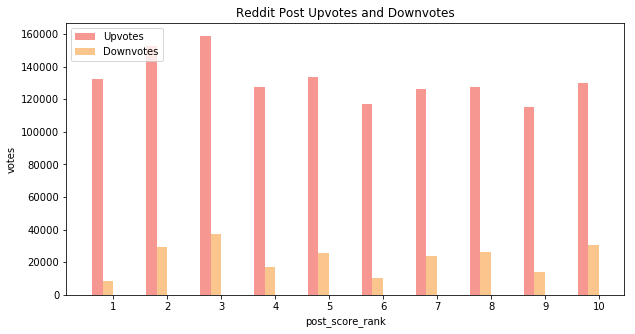

/Users/AlexBraznichenko/miniconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [4]:
#code reference from https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
pos = list(range(len(top10news_df['title'])))
width = .2

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, 
        #using df['upvotes'] data,
        top10news_df['upvotes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in title
        label=top10news_df['title'][0]) 
plt.bar([p + width for p in pos],
       top10news_df['downvotes'],
        width,
        alpha = .5,
        color='#F78F1E',
        label=top10news_df['title'][1]
       )
ax.set_ylabel('votes')
ax.set_xlabel('post_score_rank')
ax.set_title('Reddit Post Upvotes and Downvotes')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(range(1,11))
plt.legend(['Upvotes', 'Downvotes'], loc='upper left')
plt.show()
py.iplot_mpl(fig)

In [12]:
#plotly interactive barchart testing
#code reference from https://plot.ly/python/ipython-notebook-tutorial/#plotting-interactive-maps
trace_upvotes = Bar(x=top10news_df.title,
                   y=top10news_df.upvotes,
                   name='Upvotes',
                   text = top10news_df.title,
                   textposition = 'auto',
                   marker=dict(color='#FFCDD2'))

trace_downvotes = Bar(x=top10news_df.title,
                     y=top10news_df.downvotes,
                     name='Downvotes',
                     marker=dict(color='#A2D5F2'))
data = [trace_upvotes, trace_downvotes]
layout = Layout(title="Reddit Post Upvotes and Downvotes",
               xaxis=dict(title='title'))
fig=Figure(data=data, layout=layout)
url = py.plot(fig, filename = 'barchart')
print(url)
#write function that takes in data frame and returns String of the url
#for the plotly interactive graph

https://plot.ly/~reddit_unlocked/108


In [19]:
trace1 = go.Scatter(
    x = top10news_df.month_posted,
    y = top10news_df.score,
    mode = 'markers+text',
    marker = dict(
        size = (top10news_df.upvotes + top10news_df.downvotes) / 200000 * 40,
        color = top10news_df.upvote_percentage,
        colorscale = 'Portland',
        showscale = True
    ),
    text = top10news_df.domain,
    textposition = 'bottom',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#ff7f0e')
)
layout = go.Layout(
    title = 'Stats of top reddit/r/news posts',
    xaxis = dict(
        title = 'month_posted',
        ticks = 12,
    ),
    yaxis = dict(
        title = 'score',
        ticklen = 5,
    )
)
data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'reddit plot')

In [9]:
#Keyword incorporation
import newspaper
from newspaper import Article
import operator
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AlexBraznichenko/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
from textblob import TextBlob

In [12]:
######################
#                    #
#   keyword search   #
#                    #
######################

import newspaper
from newspaper import Article
import operator
import rake as rake
rake_object = rake.Rake("SmartStoplist.txt", 1, 2, 1)

[('compatibility', 1.0), ('of', 1.0), ('systems', 1.0), ('linear', 1.0), ('constraints', 1.0), ('over', 1.0), ('the', 1.0), ('set', 1.0), ('natural', 1.0), ('numbers', 1.0), ('criteria', 1.0), ('system', 1.0), ('diophantine', 1.0), ('equations', 1.0)]
[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667), ('considered types', 3.166666666666667), ('set', 2.0), ('types', 1.6666666666666667), ('considered', 1.5), ('compatibility', 1.0), ('systems', 1.0), ('criteria', 1.0), ('system', 1.0), ('components', 1.0), ('solutions', 1.0), ('algorithms', 1.0), ('construction', 1.0), ('constructing', 1.0), ('solving', 1.0)]


In [16]:
words = {}

for i in range(len(top10news_df)):
    #top10news_df.iloc[i]['url']
    myArticle = Article(top10news_df.iloc[i]['url'])
    myArticle.download()
    myArticle.parse()
    myArticle.nlp()
    for keyword in myArticle.keywords:
        if keyword not in words:
            words[keyword] = [keyword, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[keyword][1] += 1
            words[keyword][2] += top10news_df.iloc[i]['upvotes']
    #RAKE STUFF HERE
    for wordPair in rake_object.run(top10news_df.iloc[i]['title']):
        currentWord = wordPair[0]
        #print(currentWord)
        if currentWord not in words:
            words[currentWord] = [currentWord, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[currentWord][1] += 1
            words[currentWord][2] += top10news_df.iloc[i]['upvotes']
keywords_df = pd.DataFrame(words, index=['Keyword','Occurences','Upvotes'])
keywords_df = keywords_df.transpose().set_index('Keyword')
keywords_df

Occurences Upvotes
Keyword                         
100                    1  127476
100 seizures           1  127476
2017                   1  132688
300                    1  127476
300 days               1  127476
38                     1  117061
41                     1  152688
485                    1  117061
60                     1  129692
album                  1  152688
american               1  133578
american icon          1  133578
amid                   1  127437
animals                1  117061
attorney               1  127437
award                  1  133578
band                   1  152688
bans                   1  117061
bennington             1  152688
bill                   1  117061
billy                  1  127476
blocks                 1  126450
boy                    2  254952
breaks                 1  132688
briefing               1  126450
bud                    1  127476
caldwell               1  127476
california             1  117061
cannabis               1  127476
carrie                 1  129692
...                  ...     ...
soon                   1  152688
spicer                 1  127437
star                   2  244826
state                  2  275841
statement              1  152688
states                 1  158780
store                  1  117061
success                1  152688
suffered               2  254952
suicide                1  152688
times                  1  126450
true                   1  152688
trump                  3  412667
trumps                 1  158780
uk                     1  127476
united                 1  158780
video                  2  230268
videos                 1  115134
volume                 1  117061
vote                   1  117061
wars                   1  129692
way                    1  129692
white                  3  412667
white house            1  158780
woman                  1  132688
wonder                 1  152688
world                  2  266266
yates                  1  158780
youtube                1  115134
youtubers              1  115134

[174 rows x 2 columns]

In [18]:
words = []
for i in range(0, len(top10news_df['title'])):
    if (top10news_df['is_self'][i] == 0.0):
        a = Article(top10news_df['url'][i], language = 'en')
        a.download()
        a.parse()
        a.text
        a.nlp()
        for word in a.text:
            words.append(TextBlob(word))
print(words)
proper_df
for post in words:
    for word in post.tags:
        if word[1] == 'NNP':
            if keywords_df.contains(word[0]) and keywords_df['Occurences'][word[0]] > 1:
                proper_df.append(word[0])
proper_nouns

['firm', 'nonsmokers', 'national', 'world', 'cigarette', 'days', 'holiday', 'compensate', 'security', 'extra', 'breaks', 'near', 'opposition', 'election', 'kenya', 'military', 'gives', 'japanese', '2017', 'woman']
['41', 'true', 'park', 'dead', 'bennington', 'soon', 'success', 'linkin', 'suicide', 'band', 'shinoda', 'singer', 'remember', 'chester', 'wonder', 'statement', 'album']
['state', 'lawyer', 'immigration', 'department', 'states', 'justice', 'defied', 'order', 'house', 'yates', 'trumps', 'united', 'white', 'dumps', 'trump', 'fired']
['confidence', 'general', 'white', 'director', 'comey', 'amid', 'fbi', 'spicer', 'president', 'russia', 'probe', 'trump', 'fired', 'attorney']
['icon', 'hefner', 'magazine', 'playboy', 'inducted', 'world', 'hugh', 'died', 'm', 'enterprises', 'award', 'american', 'mr', 'honored', 'founder']
['vote', '38', 'bill', 'california', 'senate', 'animals', 'dogs', 'passed', 'shelters', 'pet', 'store', 'pets', '485', 'passes']
['media', 'organizations', 'office

[]